<a href="https://colab.research.google.com/github/PacktPublishing/Machine-Learning-for-Time-Series-with-Python/blob/master/chapter9/Prophet_model.ipynb" target="_parent\"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U pandas-datareader plotly

  Using cached plotly-5.3.1-py2.py3-none-any.whl (23.9 MB)
  Attempting uninstall: plotly
    Found existing installation: plotly 3.10.0
    Uninstalling plotly-3.10.0:
      Successfully uninstalled plotly-3.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
greykite 0.2.0 requires plotly<4,>=3.10.0, but you have plotly 5.3.1 which is incompatible.


In [6]:
pip install prophet

     |████████████████████████████████| 65 kB 2.4 MB/s 
     |████████████████████████████████| 49 kB 4.9 MB/s 
     |████████████████████████████████| 178 kB 10.8 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6641082 sha256=5672ac63bf1433d74247dde7236cf47f48cf489e14dec40b729056cb9559cb25
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [3]:
import pandas as pd
import numpy as np
from pandas_datareader.data import DataReader
from datetime import datetime

yahoo_data = DataReader('JPM', 'yahoo', datetime(2001, 6, 1), datetime(2021, 6, 1))
yahoo_df = yahoo_data['Adj Close'].to_frame().reset_index('Date')

In [7]:
yahoo_df.head()

,Date,Adj Close
0,2001-06-01,26.939154
1,2001-06-04,27.275278
2,2001-06-05,26.724262
3,2001-06-06,25.809589
4,2001-06-07,25.142839


In [4]:
yahoo_df.dtypes

Date         datetime64[ns]
Adj Close           float64
dtype: object

In [10]:
from prophet import Prophet

forecaster = Prophet()
forecaster.fit(yahoo_df.rename(columns={"Date": "ds", "Adj Close": "y"}))

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
future = forecaster.make_future_dataframe(periods=90)
future.tail()

,ds
5116,2021-08-26
5117,2021-08-27
5118,2021-08-28
5119,2021-08-29
5120,2021-08-30


In [13]:
forecast = forecaster.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5116,2021-08-26,127.904392,119.437334,136.699758
5117,2021-08-27,127.923486,119.152098,137.186791
5118,2021-08-28,129.850793,121.337176,139.016644
5119,2021-08-29,129.898472,121.190163,138.472808
5120,2021-08-30,128.023878,119.387225,137.481971


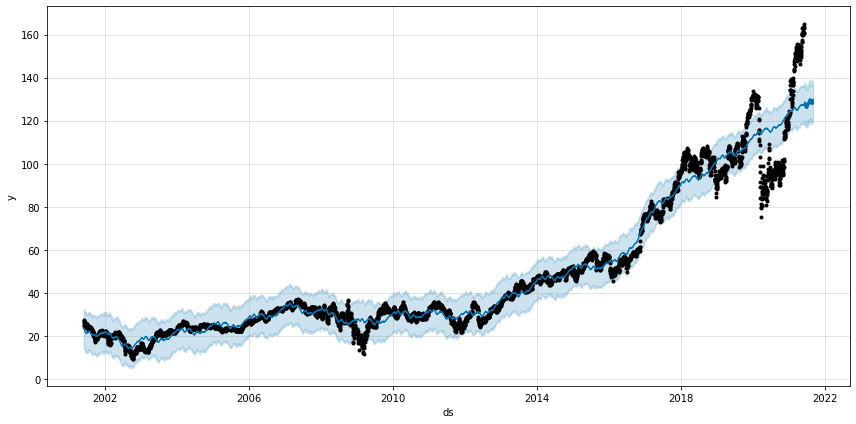

In [26]:
forecaster.plot(forecast, figsize=(12, 6));